# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime as dt

# Import API key
from api_keys import api_key

#Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

635

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# get data
query_url = base_url + "appid=" + api_key + "&units=" + units + "&q="

In [4]:
#print log
print("Beginning Data Retrival")
print("************************")
set_ct = 1
record_ct = 1
weather_data = {"City":[],"Cloudiness":[],"Country":[],"Date":[],"Humidity":[],
                "Lat":[],"Lng":[],"Max Temp":[],"Wind Speed": []}
for city in cities:
    weather_response = requests.get(query_url + city)
    weather_response_json = weather_response.json()
    
    if weather_response.status_code == 200:
        weather_data["City"].append(city)
        weather_data["Cloudiness"].append(weather_response_json['clouds']['all'])
        weather_data["Country"].append(weather_response_json['sys']['country'])
        weather_data["Date"].append(weather_response_json['dt'])
        weather_data["Humidity"].append(weather_response_json['main']['humidity'])
        weather_data["Lat"].append(weather_response_json['coord']['lat'])
        weather_data["Lng"].append(weather_response_json['coord']['lon'])
        weather_data["Max Temp"].append(weather_response_json['main']['temp_max'])
        weather_data["Wind Speed"].append(weather_response_json['wind']['speed'])
        if record_ct <= 50:
            print(f"Processing Record {record_ct} of Set {set_ct} | {city}")
            record_ct += 1 
        else:
            record_ct = 0
            set_ct += 1
            print(f"Processing Record {record_ct} of Set {set_ct} | {city}")
            record_ct += 1
    else:
        print("City not found, fret naught, 'tis but a mere flesh wound and will not stop the fight...")
print("************************")
print("Data Retrieval Complete. You are just and fair, and we will return with a shrubbery. Please continue forward")
print("************************")

Beginning Data Retrival
************************
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | narsaq
Processing Record 3 of Set 1 | dingle
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | constitucion
Processing Record 6 of Set 1 | hasaki
Processing Record 7 of Set 1 | broome
Processing Record 8 of Set 1 | whitehorse
City not found, fret naught, 'tis but a mere flesh wound and will not stop the fight...
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | independence
Processing Record 11 of Set 1 | port alfred
Processing Record 12 of Set 1 | qaanaaq
City not found, fret naught, 'tis but a mere flesh wound and will not stop the fight...
Processing Record 13 of Set 1 | mahebourg
Processing Record 14 of Set 1 | pozhva
Processing Record 15 of Set 1 | kitimat
Processing Record 16 of Set 1 | lata
Processing Record 17 of Set 1 | castro
Processing Record 18 of Set 1 | torbay
Processing Record 19 of Set 1 | butaritari
Processing

Processing Record 5 of Set 4 | gat
Processing Record 6 of Set 4 | ventspils
Processing Record 7 of Set 4 | talnakh
Processing Record 8 of Set 4 | bereda
Processing Record 9 of Set 4 | alenquer
Processing Record 10 of Set 4 | victoria
Processing Record 11 of Set 4 | arraial do cabo
Processing Record 12 of Set 4 | coihaique
Processing Record 13 of Set 4 | longyearbyen
Processing Record 14 of Set 4 | anito
Processing Record 15 of Set 4 | huescar
City not found, fret naught, 'tis but a mere flesh wound and will not stop the fight...
Processing Record 16 of Set 4 | tyukhtet
Processing Record 17 of Set 4 | new norfolk
Processing Record 18 of Set 4 | kubachi
Processing Record 19 of Set 4 | touros
Processing Record 20 of Set 4 | chuy
Processing Record 21 of Set 4 | guiyang
Processing Record 22 of Set 4 | channarayapatna
Processing Record 23 of Set 4 | sorland
City not found, fret naught, 'tis but a mere flesh wound and will not stop the fight...
Processing Record 24 of Set 4 | nago
Processing 

City not found, fret naught, 'tis but a mere flesh wound and will not stop the fight...
City not found, fret naught, 'tis but a mere flesh wound and will not stop the fight...
Processing Record 7 of Set 7 | houma
Processing Record 8 of Set 7 | znamenskoye
Processing Record 9 of Set 7 | chapais
Processing Record 10 of Set 7 | hormigueros
Processing Record 11 of Set 7 | beringovskiy
Processing Record 12 of Set 7 | roald
Processing Record 13 of Set 7 | hofn
Processing Record 14 of Set 7 | olga
Processing Record 15 of Set 7 | ostersund
Processing Record 16 of Set 7 | gigmoto
Processing Record 17 of Set 7 | druzhba
Processing Record 18 of Set 7 | bantigue
Processing Record 19 of Set 7 | port blair
Processing Record 20 of Set 7 | aykhal
City not found, fret naught, 'tis but a mere flesh wound and will not stop the fight...
Processing Record 21 of Set 7 | oil city
Processing Record 22 of Set 7 | cacu
Processing Record 23 of Set 7 | papara
Processing Record 24 of Set 7 | clyde river
Processing

Processing Record 8 of Set 10 | ligatne
Processing Record 9 of Set 10 | iskateley
Processing Record 10 of Set 10 | severnoye
Processing Record 11 of Set 10 | quatre cocos
Processing Record 12 of Set 10 | opuwo
Processing Record 13 of Set 10 | sorong
Processing Record 14 of Set 10 | honiara
Processing Record 15 of Set 10 | kabare
Processing Record 16 of Set 10 | kahului
Processing Record 17 of Set 10 | angoche
Processing Record 18 of Set 10 | komsomolskiy
Processing Record 19 of Set 10 | ishigaki
Processing Record 20 of Set 10 | ketchikan
Processing Record 21 of Set 10 | awka
Processing Record 22 of Set 10 | anda
City not found, fret naught, 'tis but a mere flesh wound and will not stop the fight...
Processing Record 23 of Set 10 | bonthe
Processing Record 24 of Set 10 | mountain home
Processing Record 25 of Set 10 | ngunguru
Processing Record 26 of Set 10 | ouallam
Processing Record 27 of Set 10 | aloleng
City not found, fret naught, 'tis but a mere flesh wound and will not stop the fi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#create then display dataframe
weather_df = pd.DataFrame(weather_data)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ushuaia,20,AR,1553360400,81,-54.81,-68.31,53.60,3.36
1,narsaq,40,GL,1553359800,44,60.91,-46.05,17.60,5.82
2,dingle,68,PH,1553362565,77,11.00,122.67,77.08,12.12
3,rikitea,32,PF,1553362568,98,-23.12,-134.97,79.33,18.95
4,constitucion,5,MX,1553362216,20,23.99,-104.67,64.00,4.70


In [6]:
#export to csv
weather_df.to_csv('weather_data.csv', encoding='utf-8', index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

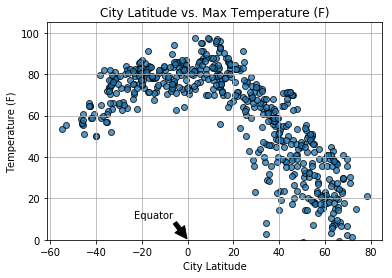

In [7]:
# Scatter plot
plt.scatter(weather_df["Lat"],weather_df["Max Temp"], marker="o", alpha=0.75, edgecolor="black")
plt.title("City Latitude vs. Max Temperature (F)")
plt.xlabel("City Latitude")
plt.ylabel("Temperature (F)")
plt.ylim(0,105)
plt.grid(True)

#annotate the equator
plt.annotate('Equator',
            xy=(0, 0), xycoords='data',
            xytext=(-15, 20), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom')

from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

plt.savefig("CityLat_v_Temp.png")

plt.show()

#### Latitude vs. Humidity Plot

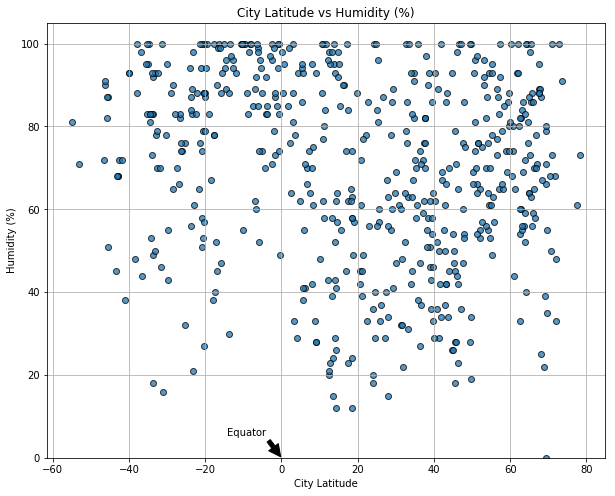

In [8]:
# Scatter plot
plt.scatter(weather_df["Lat"],weather_df["Humidity"], marker="o", alpha=0.75, edgecolor="black")
plt.title("City Latitude vs Humidity (%)")
plt.xlabel("City Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(0,105)
plt.grid(True)

#annotate the equator
plt.annotate('Equator',
            xy=(0, 0), xycoords='data',
            xytext=(-15, 20), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom')

from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

plt.savefig("CityLat_v_Hmdty.png")
plt.show()

#### Latitude vs. Cloudiness Plot

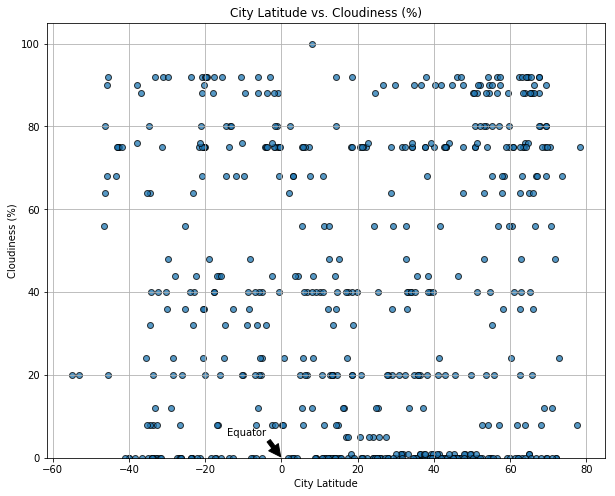

In [9]:
# Scatter plot
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"], marker="o", alpha=0.75, edgecolor="black")
plt.title("City Latitude vs. Cloudiness (%)")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(0,105)
plt.grid(True)

#annotate the equator
plt.annotate('Equator',
            xy=(0, 0), xycoords='data',
            xytext=(-15, 20), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom')

from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

plt.savefig("CityLat_v_Cld.png")
plt.show()

#### Latitude vs. Wind Speed Plot

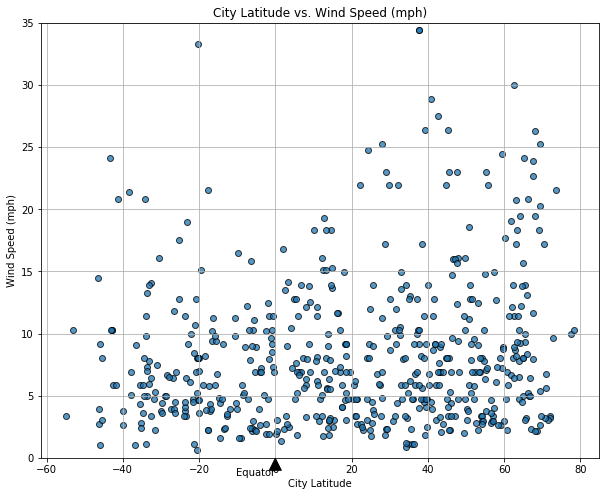

In [10]:
# Scatter plot
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"], marker="o", alpha=0.75, edgecolor="black")
plt.title("City Latitude vs. Wind Speed (mph)")
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(0,35)
plt.grid(True)

#annotate the equator
plt.annotate('Equator',
            xy=(0, 0), xycoords='data',
            xytext=(0, -20), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom')

from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

plt.savefig("CityLat_v_WndSpd.png")
plt.show()